# Raport 2. Testowanie hipotez statystycznych

Yana Negulescu

19 czerwca, 2023

---

## Spis treści:

1. Wstęp
2. Testowanie hipotezy zerowej $H_0: \, \mu = 1.5$ na poziomie istotności $\alpha = 0.5$ przeciwko trzem hipotezom alternatywnym.
    - wartość statystyki testowej
    - $H_1: \, \mu \neq 1.5$
        - obrzary krytyczne, p-wartości
        - wykres
    - $H_2: \, \mu > 1.5$
        - obrzary krytyczne, p-wartości
        - wykres
    - $H_3: \, \mu < 1.5$
        - obrzary krytyczne, p-wartości
        - wykres
    - zmiana pozioma istotności $\alpha_i = \{0.1,0.01\}$
        - wykresy
    - wnioski
3. Testowanie hipotezy zerowej $H_0: \sigma^2 = 1.5$ na poziomie istotności $\alpha = 0.5$ przeciwko trzem hipotezom alternatywnym.
    - wartość statystyki testowej
    - $H_1: \, \sigma^2 \neq 1.5$
        - obrzary krytyczne, p-wartości
        - wykres
    - $H_2: \, \sigma^2 > 1.5$
        - obrzary krytyczne, p-wartości
        - wykres
    - $H_3: \, \sigma^2 < 1.5$
        - obrzary krytyczne, p-wartości
        - wykres
    - zmiana pozioma istotności $\alpha_i = \{0.1,0.01\}$
        - wykresy
    - wnioski
4. Symulacyjne wyznaczenie błędu I rodzaju oraz błędu II rodzaju i moc testu dla hipotez z punktów 2-3.
    - bład I rodzaju
        - dla $H_0: \mu = 1.5$
        - dla $H_0: \sigma^2 = 1.5$
    - błąd II rodzaju oraz moce testów
        - dla $H_0: \mu = 1.5$
        - dla $H_0: \sigma^2 = 1.5$

---

## 1. Wstęp

W niniejszym raporcie podejmujemy wyzwanie zrozumienia i zastosowania kluczowych aspektów statystyki do analizy danych.

W pierwszych dwóch zadaniach podejmiemy próbę weryfikacji hipotez zerowych przeciwko hipotezom alternatywnym, bazując na dostępnych danych. Dla każdego przypadku obliczymy wartość statystyki testowej, określimy obszary krytyczne oraz wyznaczymy p-wartości, mając na celu uzyskanie pełnej perspektywy dla naszej analizy.

W trzecim zadaniu, skupimy się na symulacyjnym wyznaczaniu błędów I i II rodzaju oraz mocy testu. Te symulacje umożliwią nam głębsze zrozumienie konsekwencji naszych statystycznych decyzji i pozwolą ocenić skuteczność naszych testów.

Celem jest nie tylko przeprowadzenie szeregów obliczeń, ale przede wszystkim uzyskanie głębszego zrozumienia i interpretacji wyników, które te obliczenia nam dostarczą.


---

## 2. Testowanie hipotezy zerowej $H_0: \, \mu = 1.5$ na poziomie istitności $\alpha = 0.05$ przeciwko trzem hipotezom alternatywnym.
### Wartość statystyki testowej

Wykorzystujemy znormalizowaną statystykę testową Z, obliczaną jako: $$ Z = \dfrac{\overline{X}-\mu_0}{\sigma/\sqrt{n}} $$
gdzie $\overline{X}$ jest średnią próbkową,

$\mu_0$ jest wartością średniej pod hipotezą zerową,

$\sigma$ odchylenie standardowe populacji,

oraz $n$ rozmiar próby.


Pobieramy dane:

In [37]:
import csv
import numpy as np

dane = []
with open("dane1.txt", newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')

    for row in spamreader:
        try:
            x=float(row[0])
            dane.append(x)
        except:
            pass

dane=np.array(dane)
print (len(dane))

1000


Liczymy statystykę testową:

In [38]:
srednia = np.mean(dane)
mu_0 = 1.5
sigma = np.std(dane)
n = len(dane)

Z = (srednia - mu_0)/(sigma/np.sqrt(n))
print ('Statystyka testowa wynosi:', Z)

Statystyka testowa wynosi: -7.077853214134603


### $H_1: \, \mu \neq 1.5$
#### Obrzar krytyczny, p-wartość

**Obszar krytyczny** $C$ to zbiór wartości statystyki testowej, które prowadzą do odrzucenia hipotezy zerowej. Określamy go na podstawie poziomu istotności $\alpha$. 

Dla hipotezy alternatywnej: $\mu \neq \mu_0$: $$C \in (-\infty,z_{1-\frac{\alpha}{2}})  \cup  (z_{1+\frac{\alpha}{2}},+\infty)$$

**p-wartość** to prawdopodobieństwo uzyskania obserwowanej wartości statystyki testowej lub bardziej ekstremalnej, pod warunkiem, że hipoteza zerowa jest prawdziwa. $$ 2P_{H_0} (Z \geq |z|)$$ 
gdzie $z$ – wartość statystyki testowej.


In [39]:
from scipy import stats

alpha = 0.05
z = stats.norm.ppf(1 - alpha/2)
p_wartosc = 2*(1 - stats.norm.cdf(abs(Z)))

print (f'z_{1-alpha/2}: {z}')
print (f'p-wartość: {p_wartosc}')

z_0.975: 1.959963984540054
p-wartość: 1.4639400802707314e-12


#### Wykres

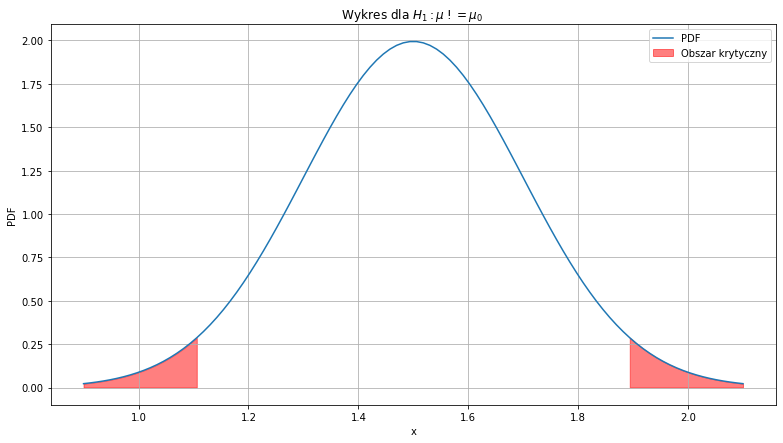

In [40]:
import matplotlib.pyplot as plt

odchylenie = 0.2

x = np.linspace(mu_0 - 3*odchylenie, mu_0 + 3*odchylenie, 100)
plt.figure(figsize=(13,7))
plt.plot(x, stats.norm.pdf(x, mu_0, odchylenie), label='PDF')

x_krytyczne = np.linspace(mu_0 - 3*odchylenie, mu_0 + 3*odchylenie, 100)
plt.fill_between(x_krytyczne[x_krytyczne < mu_0 - z * odchylenie], stats.norm.pdf(x_krytyczne[x_krytyczne < mu_0 - z * odchylenie], mu_0, odchylenie), color='red', alpha=0.5, label='Obszar krytyczny')
plt.fill_between(x_krytyczne[x_krytyczne > mu_0 + z * odchylenie], stats.norm.pdf(x_krytyczne[x_krytyczne > mu_0 + z * odchylenie], mu_0, odchylenie), color='red', alpha=0.5)

#plt.title(' nlll $\alpha = 0.05; H_1: \mu \neq \mu_0$  mmm ')
plt.title(' Wykres dla $H_1: \mu \; != \mu_0 \alpha = 0.05$  ')
plt.xlabel('x')
plt.ylabel('PDF')
plt.grid(True)
plt.legend()
plt.show()

### $H_2: \, \mu > 1.5$
#### Obrzar krytyczny, p-wartość

**Obszar krytyczny** $C$ dla hipotezy alternatywnej: $\mu > \mu_0$: $$C \in (z_{1-\alpha},+\infty)$$

In [41]:
z = stats.norm.ppf(1 - alpha)
p_wartosc = 1 - stats.norm.cdf(Z)

print (f'z_{1-alpha}: {z}')
print (f'p-wartość: {p_wartosc}')

z_0.95: 1.6448536269514722
p-wartość: 0.999999999999268


#### Wykres

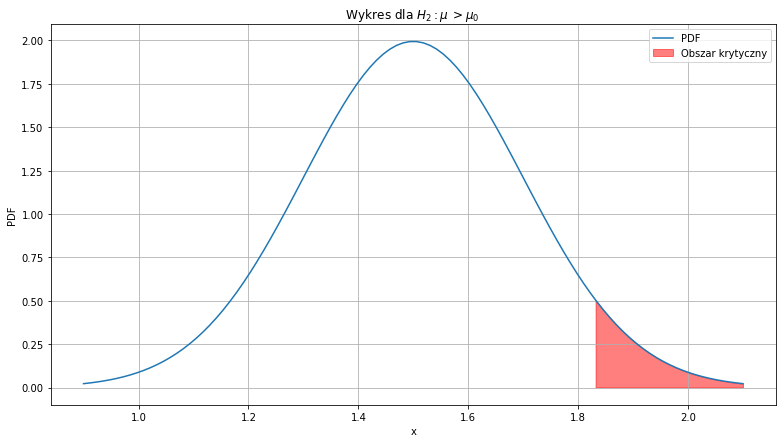

In [42]:
x = np.linspace(mu_0 - 3*odchylenie, mu_0 + 3*odchylenie, 100)
plt.figure(figsize=(13,7))
plt.plot(x, stats.norm.pdf(x, mu_0, odchylenie), label='PDF')

x_krytyczne = np.linspace(mu_0 + z * odchylenie, mu_0 + 3*odchylenie, 100)
plt.fill_between(x_krytyczne, stats.norm.pdf(x_krytyczne, mu_0, odchylenie), where=(x_krytyczne > mu_0 + z * odchylenie), color='red', alpha=0.5, label='Obszar krytyczny')

plt.title(' Wykres dla $H_2: \mu \; > \mu_0 \alpha = 0.05$  ')
plt.xlabel('x')
plt.ylabel('PDF')
plt.grid(True)
plt.legend()
plt.show()

### $H_3: \, \mu < 1.5$
#### Obrzar krytyczny, p-wartość

**Obszar krytyczny** $C$ dla hipotezy alternatywnej: $\mu < \mu_0$: $$C = (-\infty,z_{\alpha} )$$

In [43]:
z = stats.norm.ppf(alpha)
p_wartosc = stats.norm.cdf(Z)

print (f'z_{alpha}: {z}')
print (f'p-wartość: {p_wartosc}')

z_0.05: -1.6448536269514729
p-wartość: 7.320233741617279e-13


#### Wykres

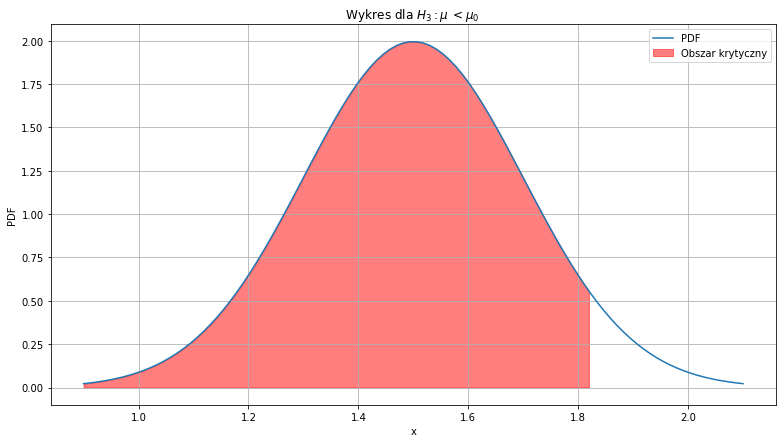

In [44]:
x = np.linspace(mu_0 - 3*odchylenie, mu_0 + 3*odchylenie, 100)
plt.figure(figsize=(13,7))
plt.plot(x, stats.norm.pdf(x, mu_0, odchylenie), label='PDF')

x_krytyczne = np.linspace(mu_0-0 - 3*odchylenie, mu_0 - z * odchylenie, 100)
plt.fill_between(x_krytyczne, stats.norm.pdf(x_krytyczne, mu_0, odchylenie), where=(x_krytyczne < mu_0 - z * odchylenie), color='red', alpha=0.5, label='Obszar krytyczny')

plt.title(' Wykres dla $H_3: \mu \; < \mu_0 \alpha = 0.05$  ')
plt.xlabel('x')
plt.ylabel('PDF')
plt.grid(True)
plt.legend()
plt.show()

### Zmiana pozioma istotności $\alpha_i = \{0.1,0.01\}$
Statystyka testowa oraz p-wartości nie zależą od pozioma istotności więc oni są rowne tym które wyznaczyliśmy w poprzednich przypadkach.

#### Wykresy

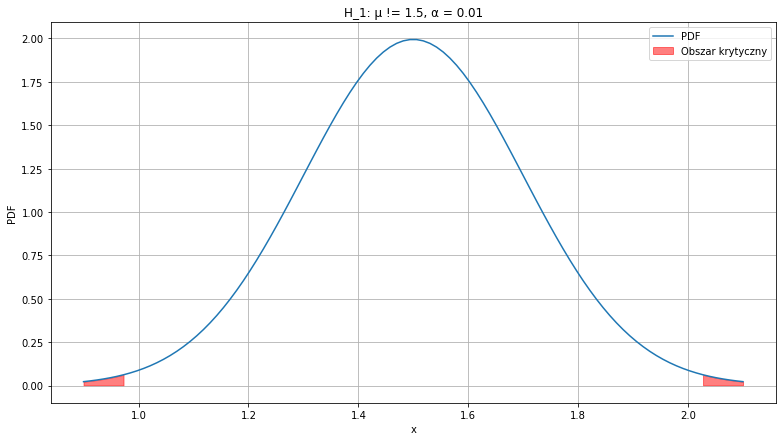

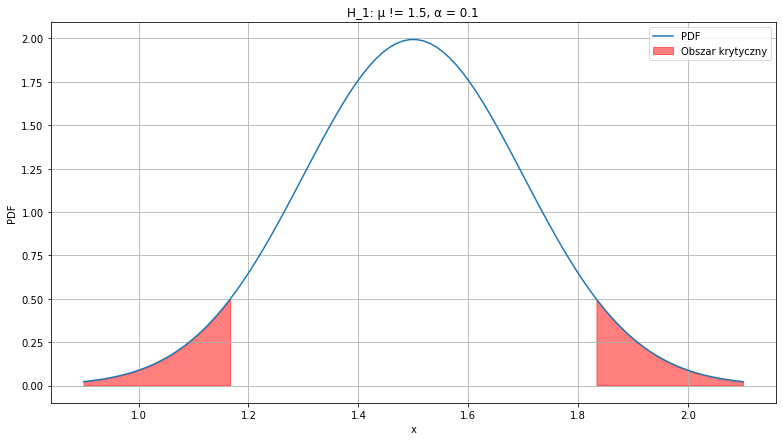

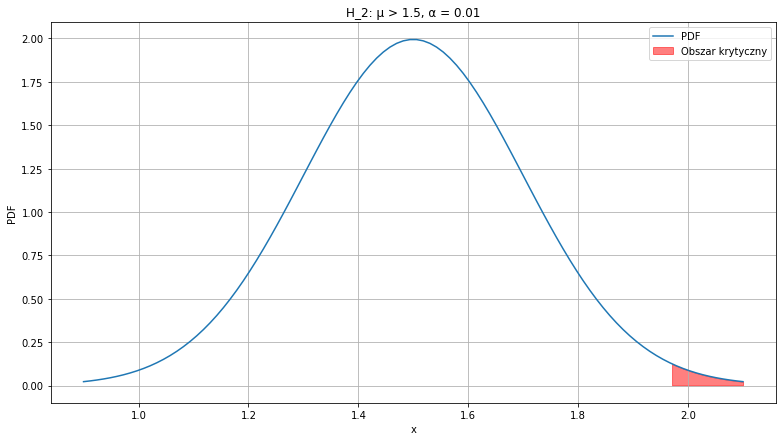

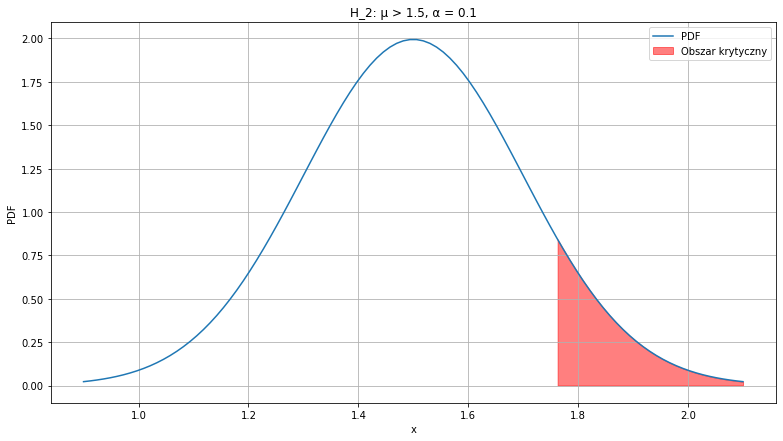

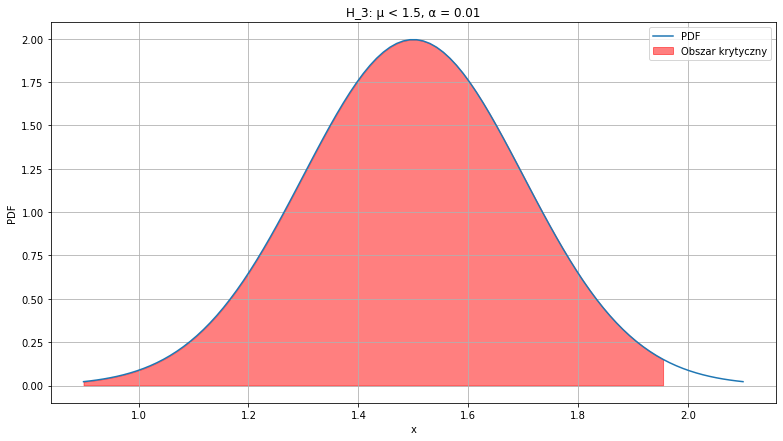

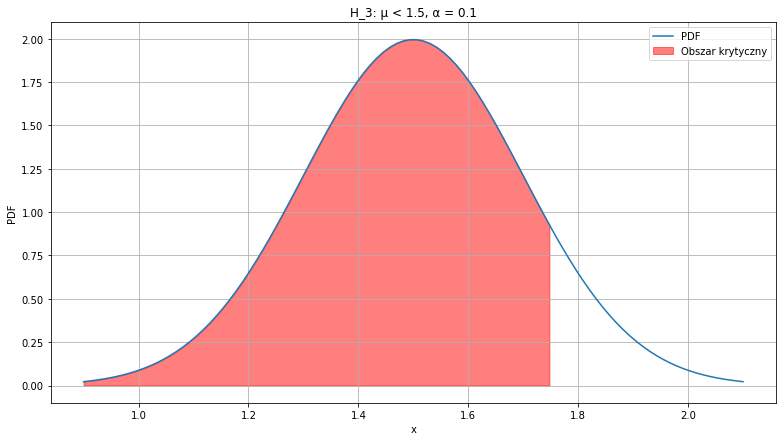

In [45]:
hipotezy = ['!=', '>', '<']
poziomy_istotnosci = [0.01, 0.1]
numer = 1

for hipoteza in hipotezy:
    for alpha in poziomy_istotnosci:
        z = stats.norm.ppf(1 - alpha/2) if hipoteza == '!=' else \
                      stats.norm.ppf(1 - alpha) if hipoteza == '>' else \
                      stats.norm.ppf(alpha)

        p_wartosc = 2*(1 - stats.norm.cdf(abs(Z))) if hipoteza == '!=' else \
                    1 - stats.norm.cdf(Z) if hipoteza == '>' else \
                    stats.norm.cdf(Z)

        x = np.linspace(mu_0 - 3*odchylenie, mu_0 + 3*odchylenie, 100)
        plt.figure(figsize=(13,7))
        plt.plot(x, stats.norm.pdf(x, mu_0, odchylenie), label='PDF')
        
        if hipoteza == '!=':
            x_krytyczne = np.linspace(mu_0 - 3*odchylenie, mu_0 + 3*odchylenie, 100)
            plt.fill_between(x_krytyczne[x_krytyczne < mu_0 - z * odchylenie], stats.norm.pdf(x_krytyczne[x_krytyczne < mu_0 - z * odchylenie], mu_0, odchylenie), color='red', alpha=0.5, label='Obszar krytyczny')
            plt.fill_between(x_krytyczne[x_krytyczne > mu_0 + z * odchylenie], stats.norm.pdf(x_krytyczne[x_krytyczne > mu_0 + z * odchylenie], mu_0, odchylenie), color='red', alpha=0.5)
        elif hipoteza == '>':
            x_krytyczne = np.linspace(mu_0 - z * odchylenie, mu_0 + 3*odchylenie, 100)
            plt.fill_between(x_krytyczne, stats.norm.pdf(x_krytyczne, mu_0, odchylenie), where=(x_krytyczne > mu_0 + z * odchylenie), color='red', alpha=0.5, label='Obszar krytyczny')
        else:
            x_krytyczne = np.linspace(mu_0 - 3*odchylenie, mu_0 - z * odchylenie, 100)
            plt.fill_between(x_krytyczne, stats.norm.pdf(x_krytyczne, mu_0, odchylenie), where=(x_krytyczne < mu_0 - z * odchylenie), color='red', alpha=0.5, label='Obszar krytyczny')

        plt.title(f'H_{numer}: μ {hipoteza} {mu_0}, α = {alpha}')
        plt.xlabel('x')
        plt.ylabel('PDF')
        plt.grid(True)
        plt.legend()
        plt.show()

        # Inkrementuj numer wykresu
    numer += 1

#### Wnioski

- $H_1: \mu_0 \neq 1.5$ p-wartość dla poziomów istotności $\alpha_i = \{0.05, 0.01, 0.1\}$ wynosi $1.4639400802707314e-12$, co jest znacznie mniejsze poziomów istotności. Oznacza to, że **odrzucamy** hipotezę zerową $H_0: \mu_0 = 1.5$ na rzecz alternatywnej hipotezy $H_1: \mu \neq 1.5$. Innymi słowy, istnieje znaczne dowód statystyczny, że średnia próbki nie jest równa 1,5.

- $H_2: \mu_0 > 1.5$ p-wartość dla poziomów istotności $\alpha_i = \{0.05, 0.01, 0.1\}$ wynosi $0.999999999999268$, jest prawie równa $\alpha_3 = 0.1$ oraz w pobliżu innych poziomów istotności. Oznacza to, że **przyjmujemy** hipotezę zerową $H_0: \mu_0 = 1.5$ na rzecz alternatywnej hipotezy $H_2: \mu > 1.5$. Innymi słowy, średnia próbki statystycznie nie jest większa niż 1,5.

- $H_3: \mu_0 < 1.5$ p-wartość dla poziomów istotności $\alpha_i = \{0.05, 0.01, 0.1\}$ wynosi $7.320233741617279e-13$, co jest znacznie mniejsze poziomów istotności. Oznacza to, że **odrzucamy** hipotezę zerową $H_0: \mu_0 = 1.5$ na rzecz alternatywnej hipotezy $H_3: \mu < 1.5$. Innymi słowy, istnieje znaczne dowód statystyczny, że średnia próbki nie jest równa 1,5.

- Podczas zmiany pozioma istotności zobaczyliśmy, że przy zwiększeniu obrzar krytyczny maleje oraz przy zmniejszeniu pozioma istotności obrzar krytyczny rośnie.

---

## 3. Testowanie hipotezy zerowej $H_0: \sigma^2 = 1.5$ na poziomie istotności $\alpha = 0.5$ przeciwko trzem hipotezom alternatywnym.
### wartość statystyki testowej

Statystyka testowa używana w teście chi-kwadrat to: $$\chi^2 = \dfrac{(n+1)S^2}{\sigma^2}$$
gdzie $n$ to rozmiar próby,

$S^2$ - estymator wariancji próbki, 

a $\sigma^2$  wartość wariancji pod hipotezą zerową.

Pobieramy dane: 

In [46]:
import csv
import numpy as np

dane = []
with open("dane2.txt", newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')

    for row in spamreader:
        try:
            x=float(row[0])
            dane.append(x)
        except:
            pass

dane=np.array(dane)
print (len(dane))

1000


In [47]:
sigma_0 = 1.5
n = len(dane)
warjancja = np.var(dane)
statystyka = (n - 1) * warjancja / sigma_0

print ('Statystyka testowa wynosi:', statystyka)


Statystyka testowa wynosi: 1109.8574804526054


### $H_1: \, \sigma^2 \neq 1.5$
#### obrzary krytyczne, p-wartości

**obrzar krytyczny**: $$C = (-\infty, z_{\frac{\alpha}{2}}) \cup (z_{1-\frac{\alpha}{2}},+\infty)$$

**p-wartość**: $$2P_{H_0} (Z \geq |z|) = 2(1-P_{H_0} (Z \leq |z|)) = 2 (1-P_{H_0} (Z \leq z)) = 2 (1 - F(z))$$

gdzie $z$ to wartość statystyki testowej,

$F(z)$ dystrybuanta rozkładu Chi-kwadrat w punkcie $z$

In [48]:
alpha = 0.05
obszar_krytyczny = [stats.chi2.ppf(alpha / 2, df=n - 1), stats.chi2.ppf(1 - alpha / 2, df=n- 1)]
p_wartosc = 2 * (1 - stats.chi2.cdf(statystyka, df=n-1))

print(f'Obszar krytyczny: (-infty,{obszar_krytyczny[0]}) and ({obszar_krytyczny[1]},+infty) ')
print('p-wartość:', p_wartosc)

Obszar krytyczny: (-infty,913.3009983021134) and (1088.4870677259353,+infty) 
p-wartość: 0.016011673877854404


#### Wykres

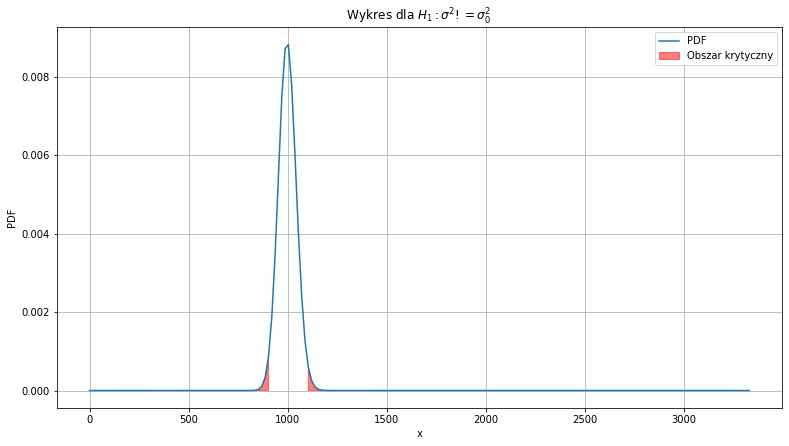

In [49]:
x = np.linspace(0, 3 * statystyka, 200)
plt.figure(figsize=(13, 7))
plt.plot(x, stats.chi2.pdf(x, df=n - 1), label='PDF')

plt.fill_between(x, stats.chi2.pdf(x, df=n - 1), where=(x <= obszar_krytyczny[0]) | (x >= obszar_krytyczny[1]), color='red', alpha=0.5, label='Obszar krytyczny')

plt.title(' Wykres dla $H_1: \sigma^2 != \sigma_0^2 \alpha = 0.05$  ')
plt.xlabel('x')
plt.ylabel('PDF')
plt.grid(True)
plt.legend()
plt.show()

### $H_2: \, \sigma^2 > 1.5$
#### obrzary krytyczne, p-wartości

**obrzar krytyczny**: $$C = (z_{1-\alpha},+\infty)$$

In [50]:
obszar_krytyczny = stats.chi2.ppf(1 - alpha, df=n - 1)
p_wartosc = 1 - stats.chi2.cdf(statystyka, df=n-1)

print(f'Obszar krytyczny: ({obszar_krytyczny},+infty)')
print('p-wartość:', p_wartosc)

Obszar krytyczny: (1073.6426506574246,+infty)
p-wartość: 0.008005836938927202


#### Wykres

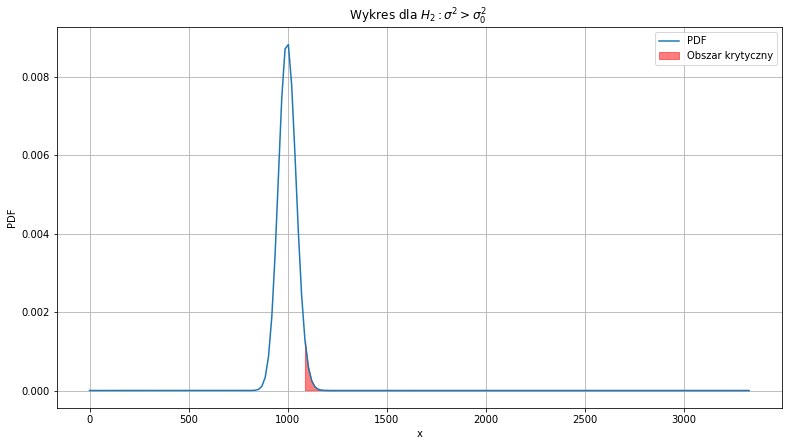

In [51]:
x = np.linspace(0, 3 * statystyka, 200)
plt.figure(figsize=(13, 7))
plt.plot(x, stats.chi2.pdf(x, df=n - 1), label='PDF')

plt.fill_between(x, stats.chi2.pdf(x, df=n - 1), where=(x >= obszar_krytyczny), color='red', alpha=0.5, label='Obszar krytyczny')

plt.title(' Wykres dla $H_2: \sigma^2 > \sigma_0^2 \alpha = 0.05$  ')
plt.xlabel('x')
plt.ylabel('PDF')
plt.grid(True)
plt.legend()
plt.show()

### $H_3: \, \sigma^2 < 1.5$
#### obrzary krytyczne, p-wartości

**obrzar krytyczny**: $$C = (+\infty,z_{\alpha})$$

In [52]:
alpha = 0.05
obszar_krytyczny = stats.chi2.ppf(alpha, df=n - 1)
p_wartosc = stats.chi2.cdf(statystyka, df=n-1)

print(f'Obszar krytyczny: (-infty,{obszar_krytyczny})')
print('p-wartość:', p_wartosc)

Obszar krytyczny: (-infty,926.6311609204329)
p-wartość: 0.9919941630610728


Wykres

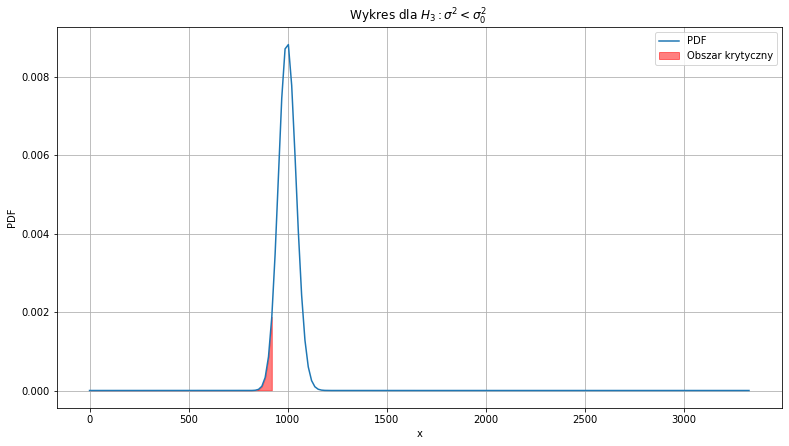

In [53]:
x = np.linspace(0, 3 * statystyka, 200)
plt.figure(figsize=(13, 7))
plt.plot(x, stats.chi2.pdf(x, df=n - 1), label='PDF')

plt.fill_between(x, stats.chi2.pdf(x, df=n - 1), where=(x <= obszar_krytyczny), color='red', alpha=0.5, label='Obszar krytyczny')

plt.title(' Wykres dla $H_3: \sigma^2 < \sigma_0^2 \alpha = 0.05$  ')
plt.xlabel('x')
plt.ylabel('PDF')
plt.grid(True)
plt.legend()
plt.show()

### Zmiana pozioma istotności $\alpha_i = \{0.1,0.01\}$
Statystyka testowa oraz p-wartości nie zależą od pozioma istotności więc oni są rowne tym które wyznaczyliśmy w poprzednich przypadkach.

#### Wykresy

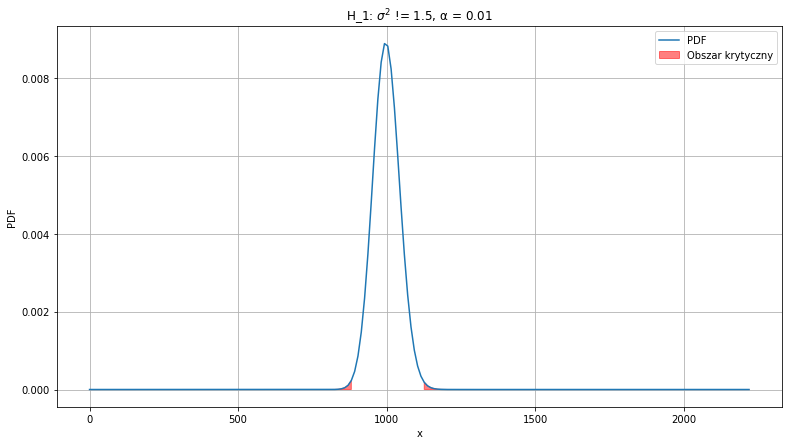

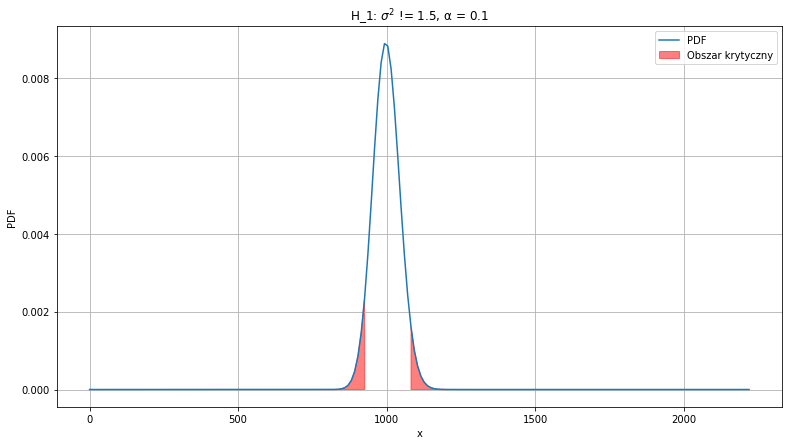

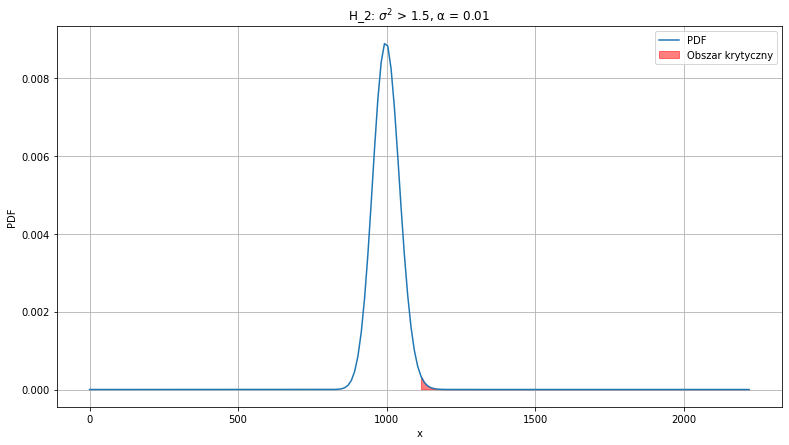

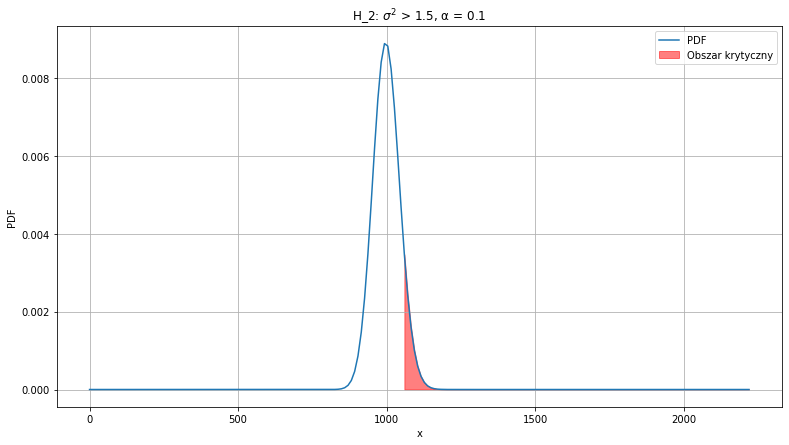

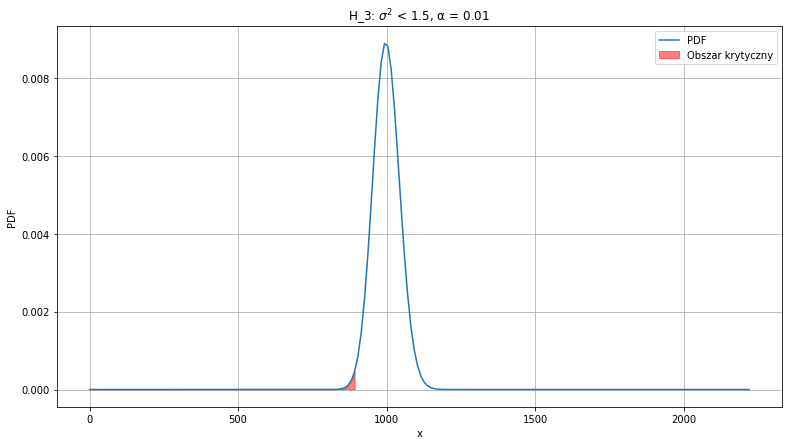

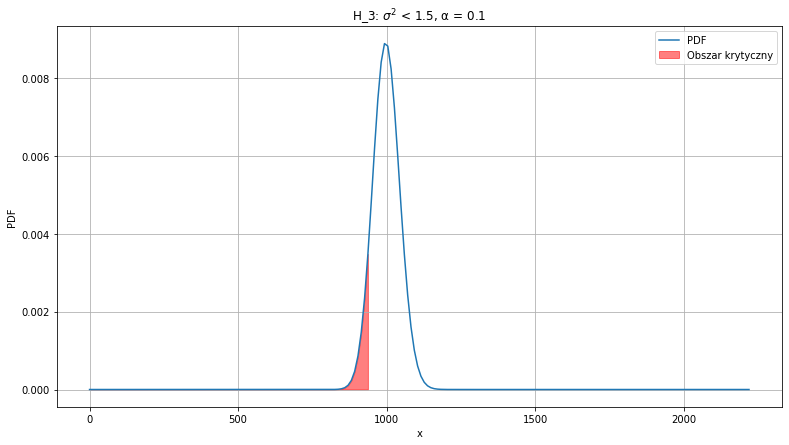

In [54]:
hipotezy = ['!=', '>', '<']
poziomy_istotnosci = [0.01, 0.1]
numer = 1

for hipoteza in hipotezy:
    for alpha in poziomy_istotnosci:
        p_wartosc = 2 * (1 - stats.chi2.cdf(statystyka, df=n-1)) if hipoteza == '!=' else \
                    1 - stats.chi2.cdf(statystyka, df=n-1) if hipoteza == '>' else \
                    stats.chi2.cdf(statystyka, df=n-1)


        x = np.linspace(0,  2*statystyka, 200)
        plt.figure(figsize=(13, 7))
        plt.plot(x, stats.chi2.pdf(x, df = n - 1), label='PDF')
        
        if hipoteza == '!=':
            obszar_krytyczny = [stats.chi2.ppf(alpha / 2, df=n - 1), stats.chi2.ppf(1 - alpha / 2, df=n - 1)]
            plt.fill_between(x, stats.chi2.pdf(x, df=n - 1), where=(x <= obszar_krytyczny[0]) | (x >= obszar_krytyczny[1]), color='red', alpha=0.5, label='Obszar krytyczny')
        elif hipoteza == '>':
            obszar_krytyczny = stats.chi2.ppf(1 - alpha, df=n - 1)
            plt.fill_between(x, stats.chi2.pdf(x, df=n - 1), where=(x >= obszar_krytyczny), color='red', alpha=0.5, label='Obszar krytyczny')
        else:
            obszar_krytyczny = stats.chi2.ppf(alpha, df=n - 1)
            plt.fill_between(x, stats.chi2.pdf(x, df=n - 1), where=(x <= obszar_krytyczny), color='red', alpha=0.5, label='Obszar krytyczny')
        
        plt.title(f'H_{numer}: $\sigma^2$ {hipoteza} {sigma_0}, α = {alpha}')
        plt.xlabel('x')
        plt.ylabel('PDF')
        plt.grid(True)
        plt.legend()
        plt.show()

        # Inkrementuj numer wykresu
    numer += 1

#### Wnioski

- $H_1: \sigma^2 \neq 1.5$ p-wartość dla poziomów istotności $\alpha_i = \{0.05, 0.01, 0.1\}$ wynosi $0.016011673877854404$, co jest znacznie w pobliżu poziomów istotności. Oznacza to, że **przyjmujemy** hipotezę zerową $H_0: \sigma^2 = 1.5$ na rzecz alternatywnej hipotezy $H_1: \sigma^2 \neq 1.5$. Innymi słowy, nie możemy stwierdzić, że wariancja populacji nie jest równa 1.5.

- $H_2: \sigma^2 > 1.5$ p-wartość dla poziomów istotności $\alpha_i = \{0.05, 0.01, 0.1\}$ wynosi $0.008005836938927202$, jest prawie równa $\alpha_2 = 0.01$ oraz w pobliżu innych poziomów istotności. Oznacza to, że **przyjmujemy** hipotezę zerową $H_0: \sigma^2 = 1.5$ na rzecz alternatywnej hipotezy $H_2: \sigma^2 > 1.5$. Innymi słowy, nie możemy stwierdzić, że wariancja populacji jest istotnie większa od 1.5.

- $H_3: \sigma^2 < 1.5$ p-wartość dla poziomów istotności $\alpha_i = \{0.05, 0.01, 0.1\}$ wynosi $0.9919941630610728$, jest prawie równa $\alpha_3 = 0.1$ oraz w pobliżu innych poziomów istotności. Oznacza to, że **przyjmujemy** hipotezę zerową $H_0: \sigma^2 = 1.5$ na rzecz alternatywnej hipotezy $H_2: \sigma^2 > 1.5$. Innymi słowy, nie możemy stwierdzić, że wariancja populacji jest istotnie mniejsza od 1.5.

- Podczas zmiany pozioma istotności zobaczyliśmy, że przy zwiększeniu obrzar krytyczny też rośnie oraz przy zmniejszeniu pozioma istotności obrzar krytyczny maleje.

---

## 4. Symulacyjne wyznaczenie błędu I rodzaju oraz błędu II rodzaju i moc testu dla hipotez z punktów 2-3.
### Bład I rodzaju
#### dla $H_0: \mu = 1.5$

Błąd pierwszego rodzaju to odrzucenie hipotezy zerowej, gdy ta jest prawdziwa. Jego teoretyczna wartość jest równa pozimowi istotności $\alpha$. Aby wyznaczyć symulacyjnie błąd I rodzaju musimy wygenerować prostą próbę losową z rozkładu normalnego o parametrach $\mu = 1.5 \text{ oraz } \sigma = 0.2$ i sprawdzić ile razy odrzucimy hipotezę zerową.

Wyznaczmy błąd pierwszego rodzaju dla **nieznanej wartości oczekiwanej**.

In [55]:
from scipy.stats import norm
import pandas as pd

def calculate_type_I_error_mean(alpha, n, mu, sigma, num_simulations, num_experiments, alternative):
    type_I_errors = []
    for _ in range(num_experiments):
        rejection_counts = []
        for _ in range(num_simulations):
            X = np.random.normal(mu, sigma, size=n)
            X_bar = np.mean(X) 
            Z = (X_bar - mu) / (sigma / np.sqrt(n)) 

            if alternative == '!=':
               critical_region = np.abs(norm.ppf(alpha / 2))
            elif alternative == '<':
               critical_region = -norm.ppf(1-alpha)
            elif alternative == '>':
                 critical_region = norm.ppf(1 - alpha)

            if (alternative == '!=' and np.abs(Z) > critical_region) or \
               (alternative == '<' and Z < critical_region) or \
               (alternative == '>' and Z > critical_region):
                rejection_counts.append(1)
            else:
                rejection_counts.append(0)

        type_I_errors.append(np.mean(rejection_counts))
    return type_I_errors


n = 1000  
mu = 1.5 
sigma = 0.2  
num_simulations = 1000  
num_experiments = 100  

alternatives = ['!=', '>', '<']  
alphas = [0.01, 0.05, 0.1]
results = {'alpha': [], '!=': [], '>': [], '<': [],}

for alpha in alphas:
    results['alpha'].append(alpha)
    for alternative in alternatives:
        error = calculate_type_I_error_mean(alpha, n, mu, sigma, num_simulations, num_experiments, alternative)
        results[alternative].append(np.mean(error))

df = pd.DataFrame(results)
df.set_index('alpha', inplace=True)
df.columns.name = 'μ'
print(df)

μ           !=        >        <
alpha                           
0.01   0.00948  0.00998  0.00967
0.05   0.04940  0.04999  0.04960
0.10   0.10038  0.10040  0.10005


Z tablicy możemy zauważyć, że symulowani prawdopodobieństwa błędu I rodzaju bliskie są wartościom poziomu istotności $\alpha$.

Narysujemy wykres pudełkowy:

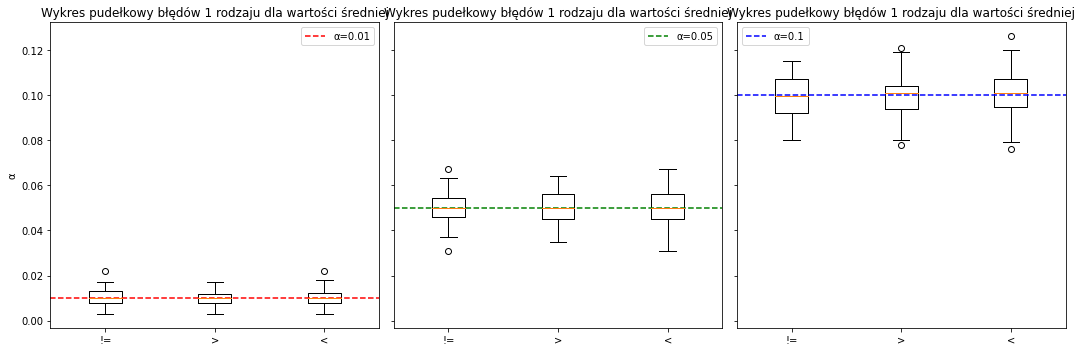

In [56]:
colors = ['r', 'g', 'b'] 

fig, axes = plt.subplots(nrows=1, ncols=len(alphas), figsize=(15, 5), sharey=True)
for i, alpha in enumerate(alphas):
    type_I_errors = []
    for alternative in alternatives:
        error = calculate_type_I_error_mean(alpha, n, mu, sigma, num_simulations, num_experiments, alternative)
        type_I_errors.append(error)
    
    axes[i].boxplot(type_I_errors, labels=alternatives)
    axes[i].axhline(y=alpha, color=colors[i], linestyle='--', label=f'α={alpha}') 
    axes[i].set_title('Wykres pudełkowy błędów 1 rodzaju dla wartości średniej')
    axes[i].legend()
axes[0].set_ylabel('α')
plt.tight_layout()
plt.show()


Powyżej możemy zobaczyć, że empiryczne średnie prawdopodobieństwa błędu I rodzaju są bliskie lub równe teoretycznym wartościom, co potwierdza prawidłowość naszych testów.

#### dla $H_0: \sigma^2 = 1.5$

Wyznaczmy błąd pierwszego rodzaju dla **nieznanej warjancji**.

In [59]:
from scipy.stats import chi2

def calculate_type_I_error_var(alpha, n, sigma, num_simulations, num_experiments, alternative):
    type_I_errors = []
    for _ in range(num_experiments):
        rejection_counts = []
        for _ in range(num_simulations):
            X = np.random.normal(0, sigma, size=n) 
            S_squared = np.var(X, ddof=1)  

            chi_squared = (n - 1) * S_squared / sigma**2
            
            if alternative == '!=':
                critical_region_left = chi2.ppf(alpha / 2, df=n-1)  
                critical_region_right = chi2.ppf(1 - alpha / 2, df=n-1)
            elif alternative == '<':
                critical_region_left = 0 
                critical_region_right = chi2.ppf(1 - alpha, df=n-1)
            elif alternative == '>':
                critical_region_left = chi2.ppf(alpha, df=n-1)  
                critical_region_right = np.inf

            if chi_squared < critical_region_left or chi_squared > critical_region_right:
                rejection_counts.append(1)
            else:
                rejection_counts.append(0)

        type_I_errors.append(np.mean(rejection_counts))
    return np.mean(type_I_errors), type_I_errors 

results = []

for alpha in alphas:
    row = []
    for alternative in alternatives:
        error = calculate_type_I_error_var(alpha, n, sigma, num_simulations, num_experiments, alternative)[0]
        row.append(error)
    results.append(row)

df = pd.DataFrame(results, index=alphas, columns=alternatives)
df.index.name = 'α'
df.columns.name = 'σ^2'
print(df)


σ^2        !=        >        <
α                              
0.01  0.00980  0.00936  0.01008
0.05  0.05082  0.05010  0.05159
0.10  0.09928  0.10023  0.10106


Z tablicy możemy zauważyć, że symulowani prawdopodobieństwa błędu I rodzaju bliskie są wartościom poziomu istotności $\alpha$

Narysujemy wykres pudełkowy:

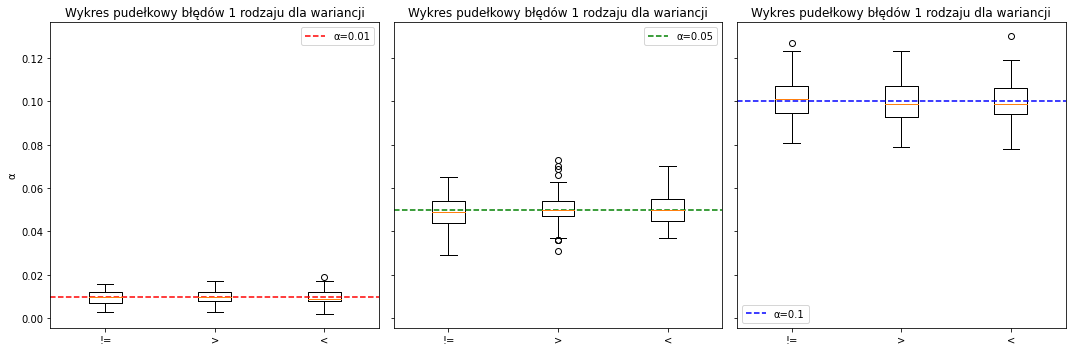

In [60]:
fig, axes = plt.subplots(nrows=1, ncols=len(alphas), figsize=(15, 5), sharey=True)
for i, alpha in enumerate(alphas):
    type_I_errors = []
    for alternative in alternatives:
        error = calculate_type_I_error_var(alpha, n, sigma, num_simulations, num_experiments, alternative)[1]
        type_I_errors.append(error)
    
    axes[i].boxplot(type_I_errors, labels = alternatives)
    axes[i].axhline(y=alpha, color=colors[i], linestyle='--', label=f'α={alpha}') 
    axes[i].set_title('Wykres pudełkowy błędów 1 rodzaju dla wariancji')
    axes[i].legend() 
axes[0].set_ylabel('α')
plt.tight_layout()
plt.show()


Powyżej możemy zobaczyć, że empiryczne średnie prawdopodobieństwa błędu I rodzaju są bliskie lub równe teoretycznym wartościom, co potwierdza prawidłowość naszych testów.

### Bład II rodzaju oraz moc testu
#### dla $H_0: \mu = 1.5$



In [61]:
def calculate_type_II_error_mean(alpha, n, mu0, mu1, sigma, num_simulations, alternative):
    type_II_errors = []
    for _ in range(num_simulations):
        X = np.random.normal(mu1, sigma, size=n)  
        X_bar = np.mean(X)
        Z = (X_bar - mu0) / (sigma / np.sqrt(n))  

        if alternative == '!=':
            critical_region = np.abs(norm.ppf(alpha / 2)) 
        elif alternative == '<':
            critical_region = -norm.ppf(1-alpha) 
        elif alternative == '>':
            critical_region = norm.ppf(1 - alpha) 

        if (alternative == '!=' and np.abs(Z) <= critical_region) or \
           (alternative == '<' and Z >= critical_region) or \
           (alternative == '>' and Z <= critical_region):
            type_II_errors.append(1)
        else:
            type_II_errors.append(0)

    return np.mean(type_II_errors), 1 - np.mean(type_II_errors)

alpha = 0.05
n = 1000  
mu0 = 1.5  

mu1_values = {
    '!=': [1.47, 1.48, 1.49, 1.51, 1.52, 1.53],
    '>': [1.51, 1.52, 1.53],
    '<': [1.47, 1.48, 1.49]
}

results = []
for alternative in alternatives:
    for mu1 in mu1_values[alternative]:
        error = calculate_type_II_error_mean(alpha, n, mu0, mu1, sigma, num_simulations, alternative)[0]
        results.append([alternative, mu1, error])

df = pd.DataFrame(results, columns=['alternative', 'mu', 'Type II error'])

df_pivot_error = df.pivot(index='alternative', columns='mu', values='Type II error')

print(df_pivot_error)

mu            1.47   1.48   1.49   1.51   1.52   1.53
alternative                                          
!=           0.001  0.107  0.626  0.618  0.114  0.002
<            0.000  0.053  0.525    NaN    NaN    NaN
>              NaN    NaN    NaN  0.535  0.056  0.002


Analizując powyższą tabelę, można zauważyć, że prawdopodobieństwo tego błędu jest wyższe w przypadku wartości średnich bliskich wartości średniej pod hipotezą zerową $(1.5)$.

- $H_1: \mu \neq 1.5$ prawdopodobieństwo błędu drugiego rodzaju jest największe, gdy μ jest bliskie 1.49 lub 1.51, co sugeruje, że test może mieć trudności z wykryciem niewielkich różnic od wartości pod hipotezą zerową.

- $H_2: \mu > 1.5$ prawdopodobieństwo błędu drugiego rodzaju jest najwyższe dla μ = 1.51, co sugeruje, że test może nie wykryć, gdy prawdziwa średnia jest nieznacznie większa od 1.5.

- $H_3: \mu < 1.5$ prawdopodobieństwo błędu drugiego rodzaju jest największe dla μ = 1.49, co oznacza, że test może nie wykryć, gdy prawdziwa średnia jest nieznacznie mniejsza od 1.5.


#### Moc testu:

Moc testu jest miarą prawdopodobieństwa odrzucenia fałszywej hipotezy $H_0$ na rzecz przyjęcia prawdziwej hipotezy $H_1$. Naszym celem jest znalezienie najmocniejszych testów, czyli takich, dla których prawdopodobieństwo błędu drugiego rodzaju jest minimalne. Moce testów można obliczyć przy użyciu wzoru: $$ 1 - \text{prawdopodobieństwo błędu drugiego rodzaju}$$

In [62]:
results = []
for alternative in alternatives:
    for mu1 in mu1_values[alternative]:
        power = calculate_type_II_error_mean(alpha, n, mu0, mu1, sigma, num_simulations, alternative)[1]
        results.append([alternative, mu1, power])

df = pd.DataFrame(results, columns=['alternative', 'mu', 'Power'])

df_pivot_power = df.pivot(index='alternative', columns='mu', values='Power')

print(df_pivot_power)

mu            1.47   1.48   1.49   1.51   1.52   1.53
alternative                                          
!=           0.995  0.908  0.357  0.341  0.878  0.999
<            0.998  0.928  0.468    NaN    NaN    NaN
>              NaN    NaN    NaN  0.460  0.929  1.000


Możemy zauważyć, że moc testów jest najwyższa, gdy prawdziwa średnia jest daleko od wartości pod hipotezą zerową $(1.5)$. Dla wartości średniej bliskich $1.5$, moc testów spada, co oznacza, że testy te są mniej skuteczne w wykrywaniu różnic od hipotezy zerowej.

#### dla $H_0: \sigma^2 = 1.5$


In [63]:
def calculate_type_II_error_var(alpha, n, sigma0, sigma1, num_simulations, alternative):
    type_II_errors = []
    for _ in range(num_simulations):
        X = np.random.normal(0, sigma1, size=n) 
        S_squared = np.var(X, ddof=1) 
        
        chi_squared = (n - 1) * S_squared / sigma0**2

        if alternative == '!=':
            critical_region_left = chi2.ppf(alpha / 2, df=n-1)  
            critical_region_right = chi2.ppf(1 - alpha / 2, df=n-1)
        elif alternative == '<':
            critical_region_left = 0 
            critical_region_right = chi2.ppf(1 - alpha, df=n-1)
        elif alternative == '>':
            critical_region_left = chi2.ppf(alpha, df=n-1)
            critical_region_right = np.inf

        if chi_squared > critical_region_left and chi_squared < critical_region_right:
            type_II_errors.append(1)
        else:
            type_II_errors.append(0)

    return np.mean(type_II_errors), 1 - np.mean(type_II_errors)

alpha = 0.05  
n = 1000  
sigma0 = 0.2
num_simulations = 1000  

alternatives = ['!=', '>', '<']  

sigma1_values = {
    '!=': [0.18, 0.19, 0.20, 0.21, 0.22, 0.23],
    '>': [0.21, 0.22, 0.23],
    '<': [0.18, 0.19, 0.20]
}

results = []
for alternative in alternatives:
    for sigma1 in sigma1_values[alternative]:
        error= calculate_type_II_error_var(alpha, n, sigma0, sigma1, num_simulations, alternative)[0]
        results.append([alternative, sigma1, error])

# Create DataFrame
df = pd.DataFrame(results, columns=['alternative', 'sigma1', 'Type II error'])

# Pivot the DataFrame
df_pivot_error = df.pivot(index='alternative', columns='sigma1', values='Type II error')

print(df_pivot_error)


sigma1        0.18   0.19   0.20   0.21   0.22  0.23
alternative                                         
!=           0.005  0.376  0.952  0.406  0.011   0.0
<            1.000  1.000  0.946    NaN    NaN   NaN
>              NaN    NaN    NaN  1.000  1.000   1.0


Analizując powyższą tabelę, możemy zauważyć, że prawdopodobieństwo tego błędu jest wysokie, gdy wartość wariancji jest bliska wartości wariancji pod hipotezą zerową $(1.5)$.

- $H_1: \sigma^2 \neq 1.5$ prawdopodobieństwo błędu drugiego rodzaju jest najwyższe, gdy $\sigma^2$ jest bliskie $0.20$. To sugeruje, że test może mieć trudności z wykryciem niewielkich różnic od wartości pod hipotezą zerową.

- $H_2: \sigma^2 > 1.5$ prawdopodobieństwo błędu drugiego rodzaju jest najwyższe dla $\sigma^2$ równego $0.21, 0.22, 0.23$, co sugeruje, że test może nie wykryć, gdy prawdziwa wariancja jest nieznacznie większa od $1.5$.

- $H_3: \sigma^2 < 1.5$ prawdopodobieństwo błędu drugiego rodzaju jest największe dla $\sigma^2$ równego $0.19, 0.20$, co oznacza, że test może nie wykryć, gdy prawdziwa wariancja jest nieznacznie mniejsza od $1.5$.

Tak więc, podobnie jak w poprzednim przypadku, powinniśmy być ostrożni przy interpretacji wyników testu, szczególnie gdy oczekiwane różnice są niewielkie.


#### Moce testów

In [64]:
results = []
for alternative in alternatives:
    for sigma1 in sigma1_values[alternative]:
        power = calculate_type_II_error_var(alpha, n, sigma0, sigma1, num_simulations, alternative)[1]
        results.append([alternative, sigma1, power])

# Create DataFrame
df = pd.DataFrame(results, columns=['alternative', 'sigma1', 'power'])

# Pivot the DataFrame
df_pivot_power = df.pivot(index='alternative', columns='sigma1', values='power')

print(df_pivot_power)


sigma1        0.18   0.19   0.20   0.21   0.22  0.23
alternative                                         
!=           0.997  0.632  0.056  0.594  0.988   1.0
<            0.000  0.000  0.047    NaN    NaN   NaN
>              NaN    NaN    NaN  0.000  0.000   0.0


Podobnie jak w przypadku średniej, moc testów jest najwyższa, gdy prawdziwa wariancja jest daleko od wartości pod hipotezą zerową $(1.5)$. Wartości bliskie $1.5$ prowadzą do mniejszej mocy testów, co oznacza, że są one mniej skuteczne w wykrywaniu różnic od hipotezy zerowej.